In [1]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import string

In [2]:
# Descargar stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
stop_words = set(stopwords.words('english'))

In [5]:
df = pd.read_csv('scopus.csv')
df.head()

Authors  \
0  Faraz A.; Ahsan F.; Mounsef J.; Karamitsos I.;...   
1               Ansari N.; Babaei V.; Najafpour M.M.   
2  Singh A.K.; Lamichhane B.; Devkota S.; Dhakal ...   
3  Huo B.; McKechnie T.; Ortenzi M.; Lee Y.; Anto...   
4  Mira F.A.; Favier V.; dos Santos Sobreira Nune...   

                                   Author full names  \
0  Faraz, Anum (57958711500); Ahsan, Fardin (5742...   
1  Ansari, Navid (57220543157); Babaei, Vahid (42...   
2  Singh, Aniket Kumar (58646843500); Lamichhane,...   
3  Huo, Bright (57374863600); McKechnie, Tyler (5...   
4  Mira, Felipe Ahumada (58694177700); Favier, Va...   

                                        Author(s) ID  \
0  57958711500; 57424540400; 36562285700; 6506423...   
1              57220543157; 42361030300; 14007409000   
2  58646843500; 58712459600; 57934118900; 5722373...   
3  57374863600; 57207916696; 57057626600; 5718971...   
4  58694177700; 57193766813; 57214108221; 5824354...   

                                               Title  Year  \
0  Enhancing Child Safety in Online Gaming: The D...  2024   
1  Enhancing catalysis studies with chat generati...  2024   
2  Do Large Language Models Show Human-like Biase...  2024   
3  Dr. GPT will see you now: the ability of large...  2024   
4  Chat GPT for the management of obstructive sle...  2024   

                                 Source title Volume Issue Art. No.  \
0                   Information (Switzerland)     15     4      233   
1                         Dalton Transactions     53     8      NaN   
2                   Information (Switzerland)     15     2       92   
3                       Health and Technology     14     3      NaN   
4  European Archives of Oto-Rhino-Laryngology    281     4      NaN   

  Page start  ...                         DOI  \
0        NaN  ...        10.3390/info15040233   
1       3534  ...          10.1039/d3dt04178f   
2        NaN  ...        10.3390/info15020092   
3        463  ...  10.1007/s12553-024-00836-9   
4       2087  ...  10.1007/s00405-023-08270-9   

                                                Link  \
0  https://www.scopus.com/inward/record.uri?eid=2...   
1  https://www.scopus.com/inward/record.uri?eid=2...   
2  https://www.scopus.com/inward/record.uri?eid=2...   
3  https://www.scopus.com/inward/record.uri?eid=2...   
4  https://www.scopus.com/inward/record.uri?eid=2...   

                                            Abstract  \
0  This study introduces Protectbot, an innovativ...   
1  The progress made in natural language processi...   
2  This study investigates self-assessment tenden...   
3  Purpose: This study assessed the performance o...   
4  Purpose: This study explores the potential of ...   

                                     Author Keywords  \
0  artificial intelligence; chatbot technology; c...   
1                                                NaN   
2  AI ethics; artificial intelligence; BARD; chat...   
3  Artificial intelligence; Colorectal cancer scr...   
4                Chat-Gpt; Chatbot; OSA; Sleep apnea   

                                      Index Keywords Document Type  \
0  Classification (of information); E-learning; O...       Article   
1  Natural language processing systems; alanine a...       Article   
2  Artificial intelligence; Natural language proc...       Article   
3  adult; Article; artificial intelligence; cance...       Article   
4  Alanine Transaminase; Clinical Decision-Making...       Article   

  Publication Stage                        Open Access  Source  \
0             Final  All Open Access; Gold Open Access  Scopus   
1             Final                                NaN  Scopus   
2             Final  All Open Access; Gold Open Access  Scopus   
3             Final                                NaN  Scopus   
4             Final                                NaN  Scopus   

                  EID  
0  2-s2.0-85191658311  
1  2-s2.0-85183838063  
2  2-s2.0-85185707219  
3  2-s2.0-8519

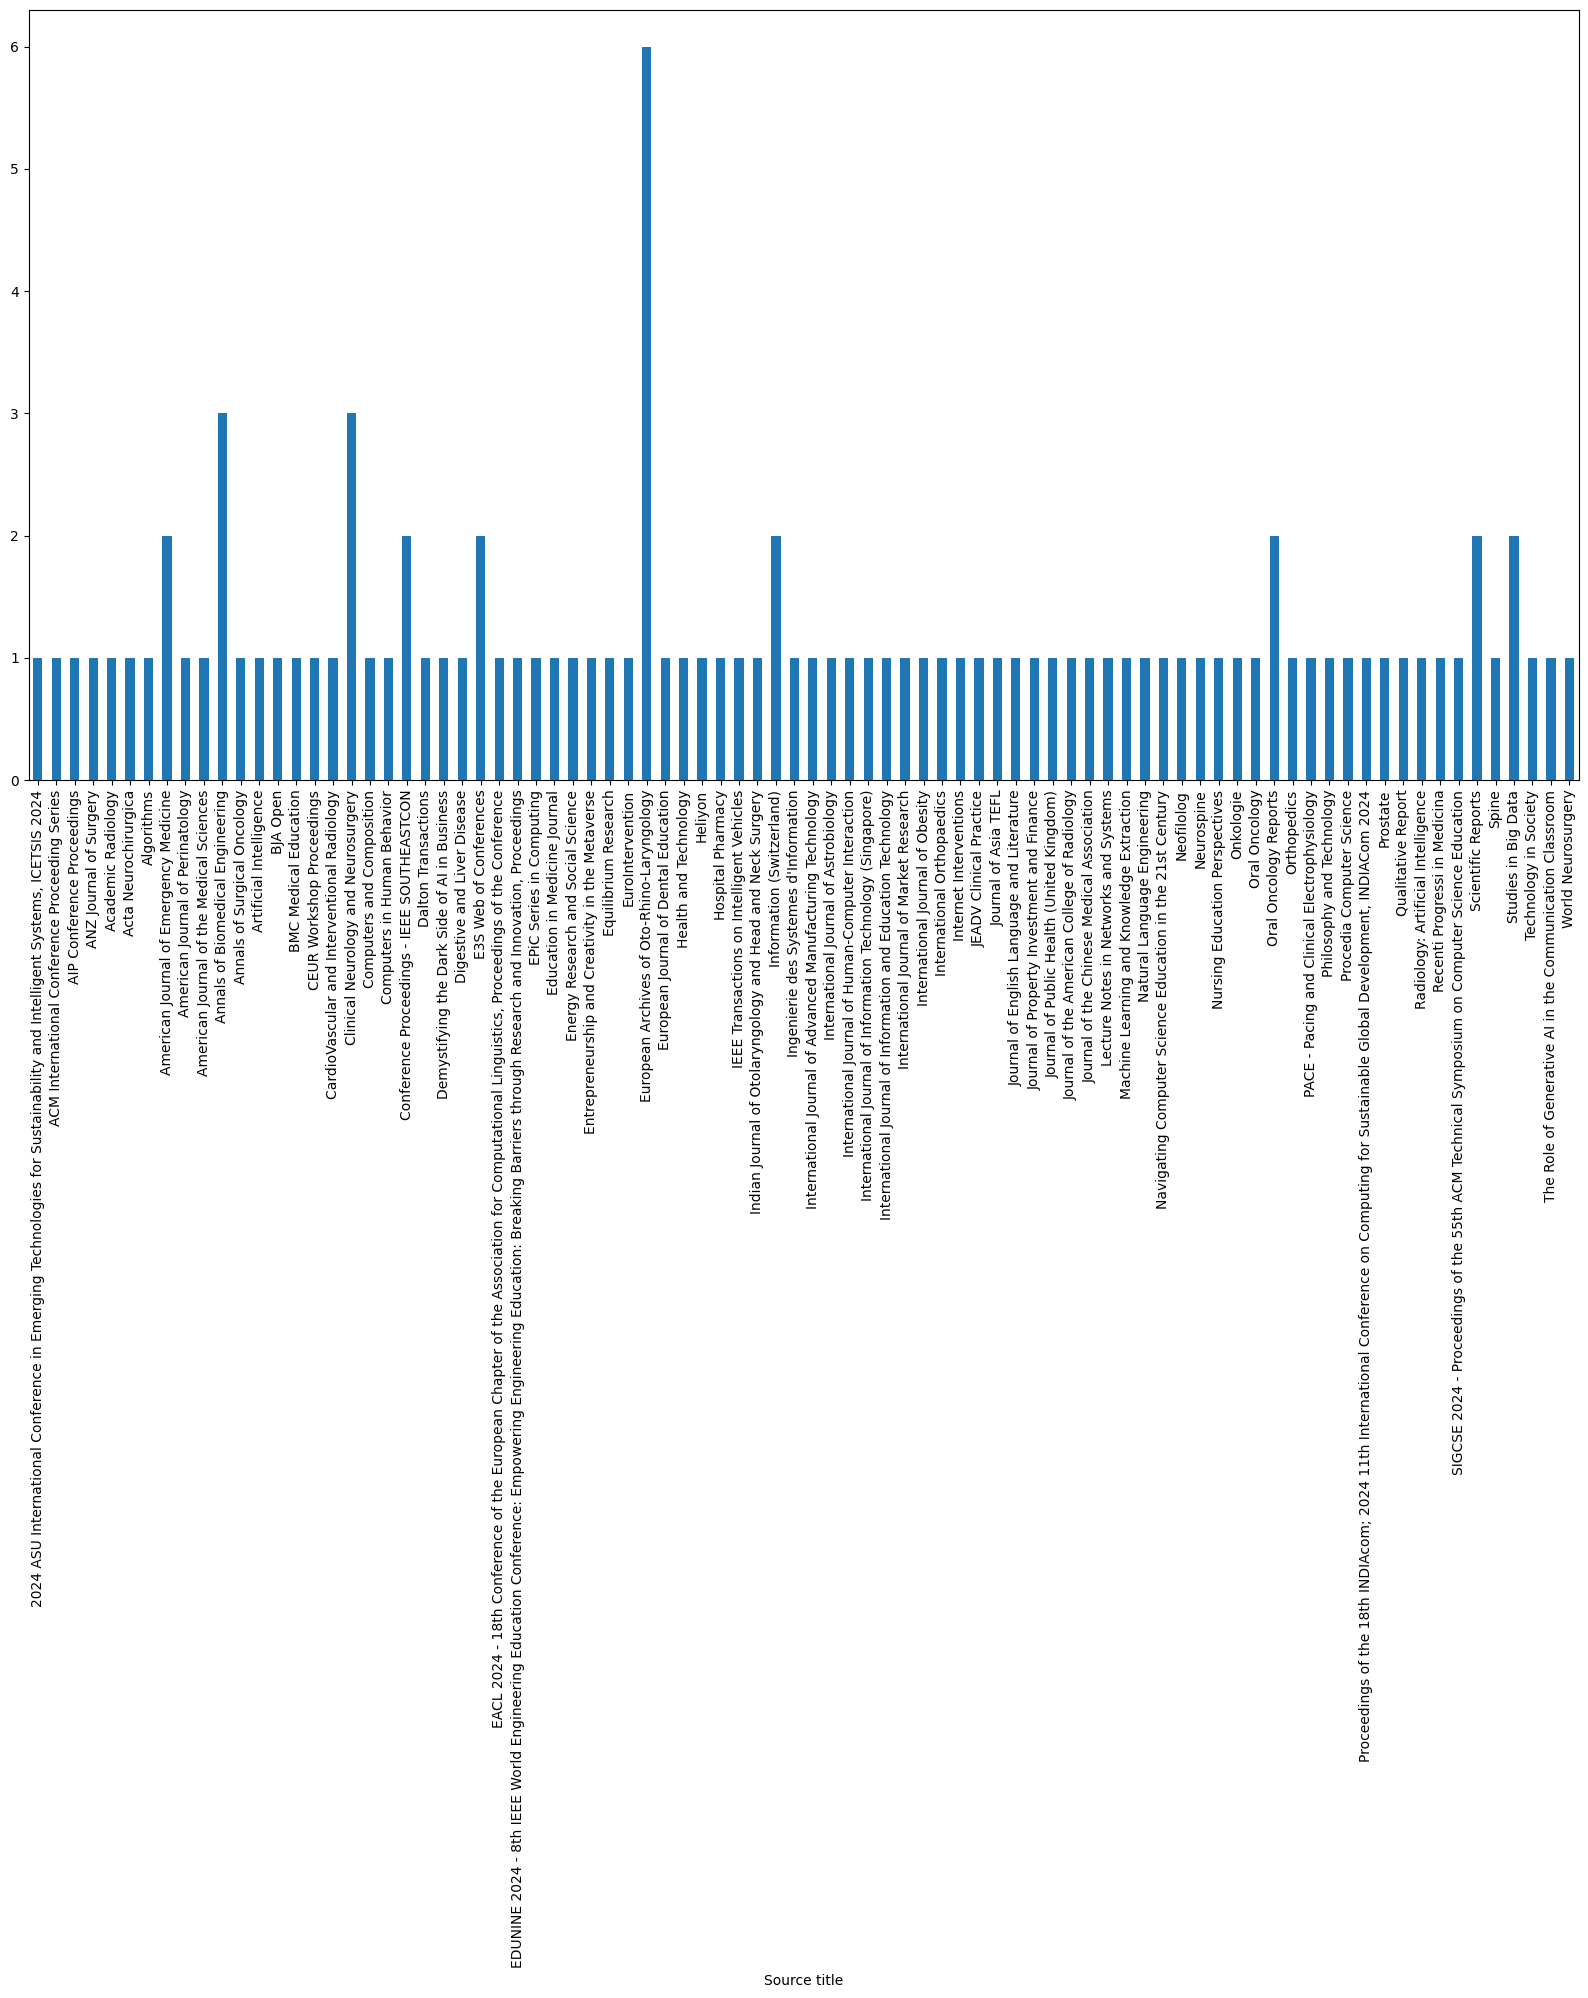

In [6]:
grouped = df.groupby('Source title')['Title'].count()
plt.figure(figsize=(20, 10))
grouped.plot(kind='bar')
plt.show()

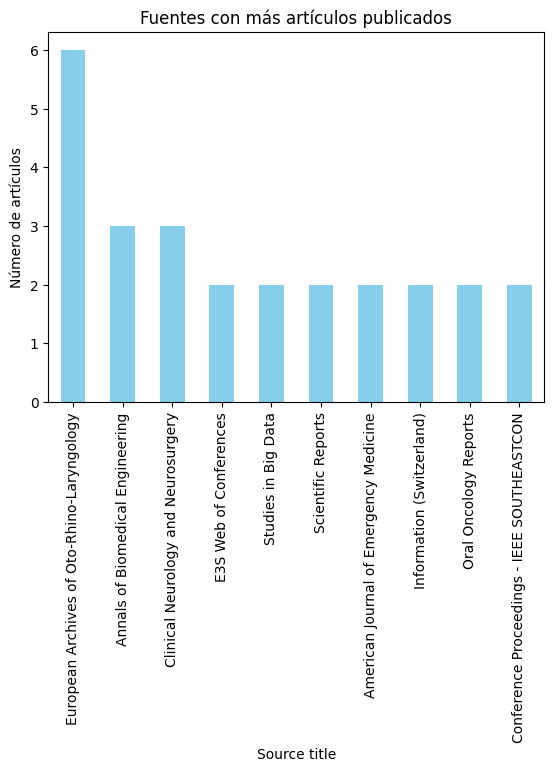

In [7]:
grouped = df.groupby('Source title')['Title'].count().sort_values(ascending=False)
top_sources = grouped.head(10)
top_sources.plot(kind='bar', color='skyblue')
plt.title('Fuentes con más artículos publicados')
plt.xlabel('Source title')
plt.ylabel('Número de artículos')
plt.show()

In [8]:
# Función para limpiar y preparar texto
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in text.split() if word not in stop_words])

ANALIZAR TITULOS

In [9]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Contar palabras en todos los títulos
word_counts = Counter()
df['clean_title'].str.split().apply(word_counts.update)

# Crear un DataFrame a partir del contador de palabras
word_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Ordenar las palabras por frecuencia de aparición, de mayor a menor
word_df = word_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Añadir columna de rank
word_df['Rank'] = word_df['Frequency'].rank(method='dense', ascending=False)

# Mostrar el DataFrame de palabras ordenadas por rango
word_df.head(15)

Word  Frequency  Rank
0        chatgpt         28   1.0
1           chat         21   2.0
2            gpt         19   3.0
3       language         17   4.0
4             ai         16   5.0
5     artificial         14   6.0
6   intelligence         12   7.0
7         models         12   7.0
8      education         12   7.0
9          large         11   8.0
10         study         10   9.0
11    generative         10   9.0
12          tool          8  10.0
13     exploring          6  11.0
14       patient          6  11.0

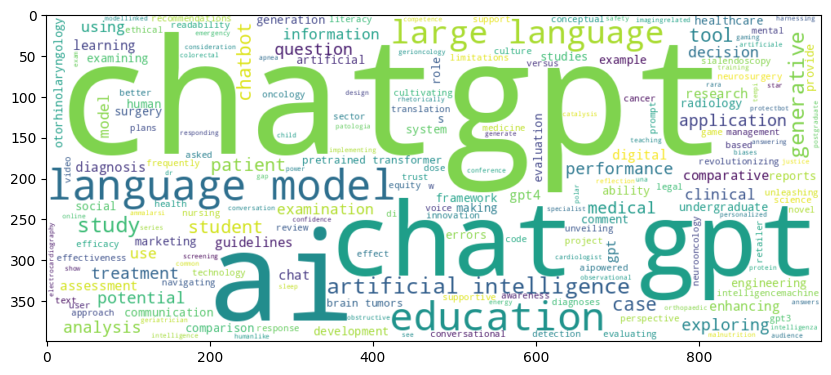

In [10]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Concatenar todos los títulos limpios en un solo texto
text = ' '.join(df['clean_title'])

wordcloud = WordCloud(width = 950, height = 400, background_color ='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()

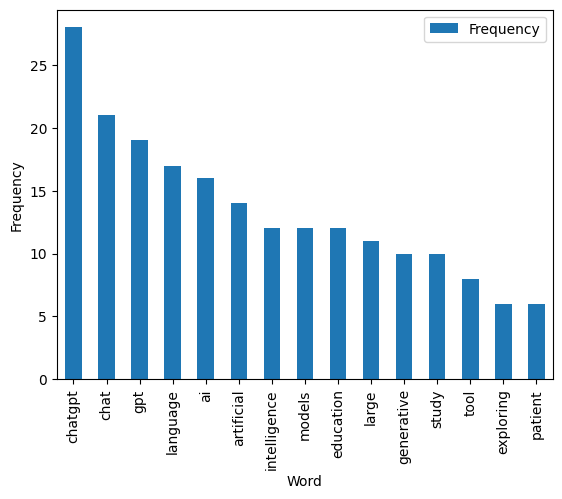

In [11]:
import matplotlib.pyplot as plt
word_df.sort_values(by='Frequency', ascending=False).head(15).plot(x='Word', y='Frequency', kind='bar')
plt.xlabel('Word')
_ = plt.ylabel('Frequency')

<ipython-input-12-b0f32e8be36a>:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama


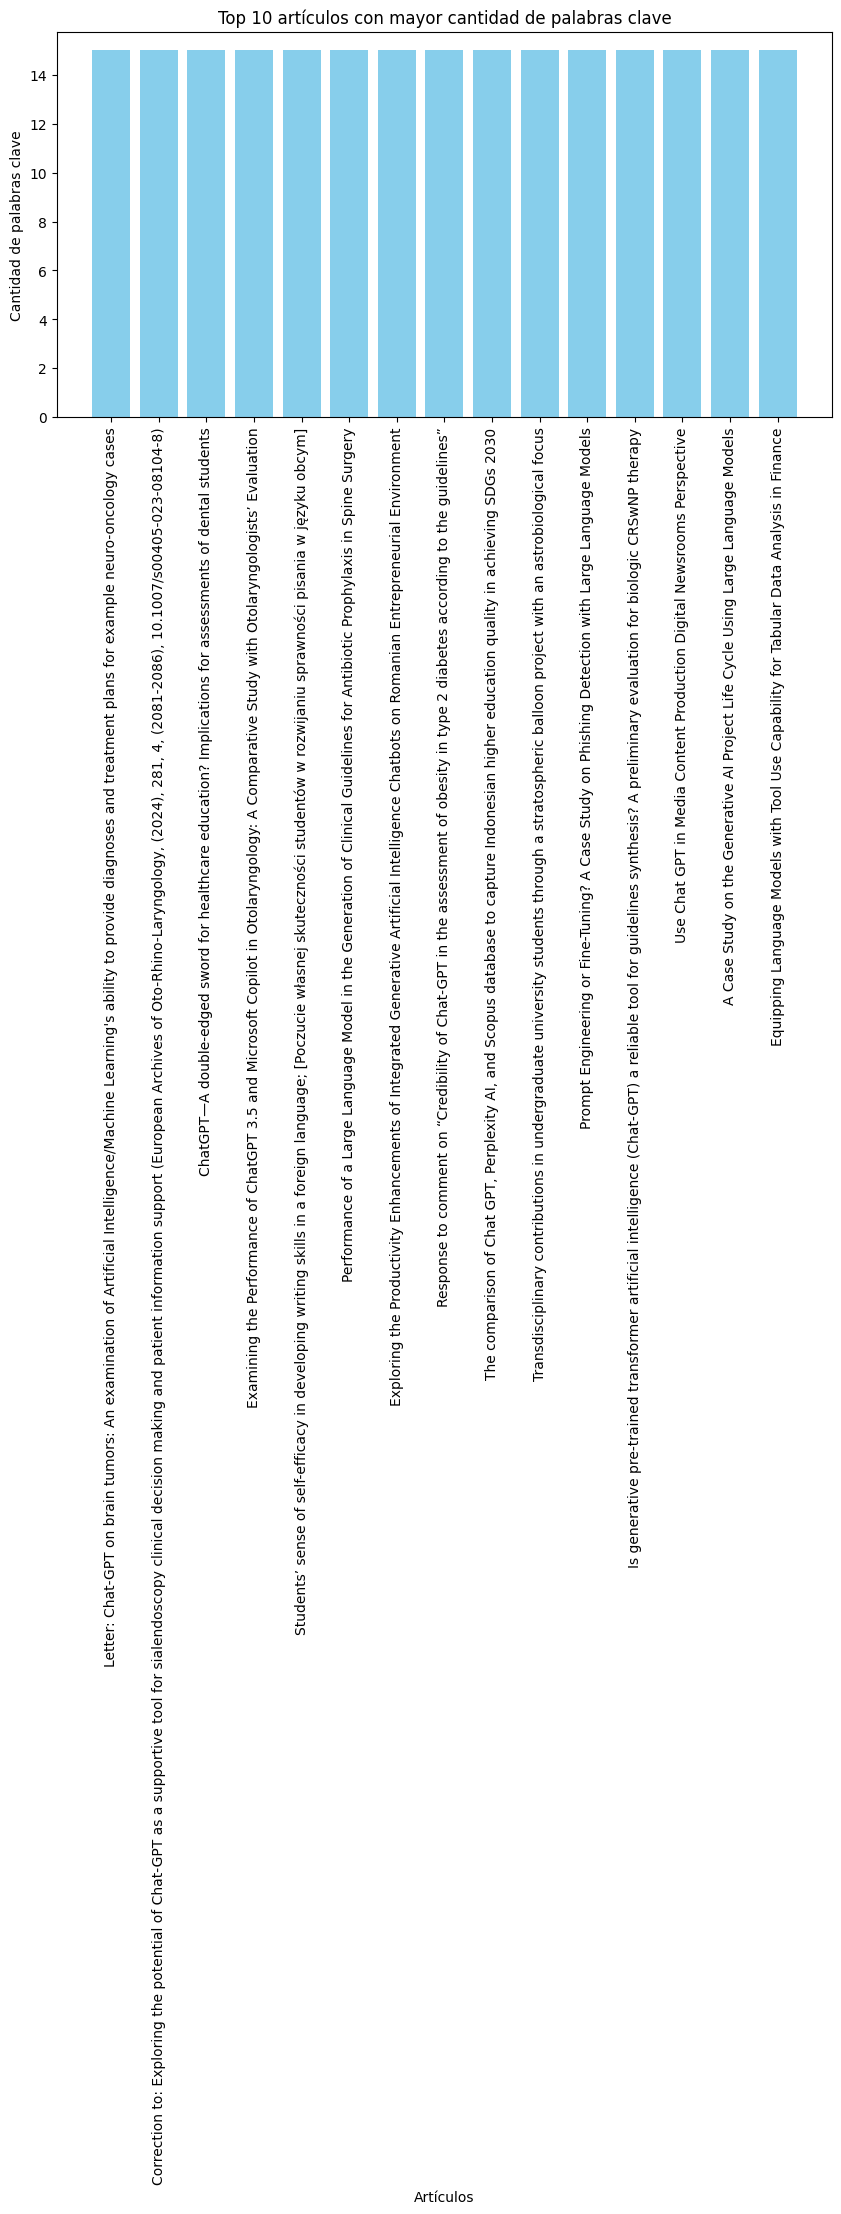

In [12]:
# Contar palabras en todos los títulos
word_counts = Counter()
df['Title'].apply(lambda title: word_counts.update(clean_text(title)))

# Determinar un número de palabras clave a considerar (e.g., top 10)
num_keywords = 15
keywords = [word for word, count in word_counts.most_common(num_keywords)]

# Función para contar cuántas palabras clave contiene cada título
def count_keywords(title):
    words = clean_text(title)
    return sum(word in words for word in keywords)

# Contar las palabras clave por título
df['keyword_count'] = df['Title'].apply(count_keywords)

# Ordenar el DataFrame por 'keyword_count' de forma descendente
df_sorted = df.sort_values(by='keyword_count', ascending=False)

# Graficar los top 10 artículos con más palabras clave
plt.figure(figsize=(10, 5))
plt.bar(df_sorted['Title'].head(15), df_sorted['keyword_count'].head(15), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Artículos')
plt.ylabel('Cantidad de palabras clave')
plt.title('Top 10 artículos con mayor cantidad de palabras clave')
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()

ANALIZAR ABSTRACT

In [13]:
# Seleccionar los abstracts de los artículos con más palabras clave
top_abstracts = df.sort_values(by='keyword_count', ascending=False).head(5)['Abstract']

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:5]  # Tomar las 3 oraciones con mayor puntuación
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado
top_abstracts_summary = top_abstracts.apply(summarize_abstract)

# Mostrar resúmenes
for i, summary in enumerate(top_abstracts_summary, 1):
    print(f"Resumen {i}:\n{summary}\n")

Resumen 1:
[No abstract available]

Resumen 2:
© The Author(s), under exclusive licence to Springer-Verlag GmbH Germany, part of Springer Nature 2023. In this article, the ethics declaration statement was missing and it should have been read as “The author Jerome R. Lechien is also guest editor of the special issue on ‘ChatGPT and Artificial Intelligence in Otolaryngology-Head and Neck Surgery’. He was not involved with the peer review process of this article”. The original article was updated.

Resumen 3:
This study aims to evaluate the performance of Chat Generative Pre-trained Transformer (ChatGPT), a generative AI-based application, on a wide range of assessments used in contemporary healthcare education and discusses the implications for undergraduate dental education. A total of 50 independent items encompassing 50 different learning outcomes (n = 10 per item) were developed by the research team. Introduction: Open-source generative artificial intelligence (AI) applications are f

In [14]:
# Contar la aparición de palabras clave en cada título
df['keyword_count'] = df['Title'].apply(lambda x: sum(word in clean_text(x) for word in word_df))

# Seleccionar los abstracts de los artículos con más palabras clave
top_articles = df.sort_values(by='keyword_count', ascending=False).head(10)

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:2]
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado y almacenar junto con el título
top_articles['Summary'] = top_articles['Abstract'].apply(summarize_abstract)

# Mostrar títulos y resúmenes
for index, row in top_articles.iterrows():
    print(f"Title: {row['Title']}\nSummary: {row['Summary']}\n")

Title: Enhancing Child Safety in Online Gaming: The Development and Application of Protectbot, an AI-Powered Chatbot Framework
Summary: Protectbot represents a crucial innovation in enhancing child safety within online gaming communities, providing a proactive, AI-enhanced solution to detect and address predatory threats promptly. These metrics not only demonstrate the classifier’s effectiveness, but also signify a significant advancement beyond existing methodologies in this field.

Title: Exploring the Productivity Enhancements of Integrated Generative Artificial Intelligence Chatbots on Romanian Entrepreneurial Environment
Summary: Even though artificial intelligence has been in use for a while, only recently Open A.I.’s GPT models and chat GPT getting acclaimed by the wide public and acknowledged as the starter of a new “battle” for supremacy amongst technology and business solutions, one of Generative Artificial Intelligence. The Romanian landscape of business and technology is ev